In [1]:
import csv
file = open("names.csv", "r")
words = list(csv.reader(file, delimiter=","))
file.close()


In [2]:
words=words[1:]

In [3]:
from functools import reduce
words = reduce(lambda a,b:a+b, words)
words = [word.rstrip() for word in words]

In [8]:
# gets the count of unique letters used to form names in our model 
def count_unique_letters(s):
    # Convert the string to lowercase and filter out non-letter characters
    s = ''.join(s)
    unique_letters = len(set(s))
    return unique_letters,set(s)

unique_letter_count,unique_letters = count_unique_letters(words)
print(unique_letter_count)
print(unique_letters)

29
{'R', 'Q', 'K', 'B', 'Z', 'W', 'X', 'U', 'D', 'M', 'G', "'", 'L', 'T', 'E', 'F', 'V', 'S', 'Y', '.', 'A', '-', 'N', 'H', 'I', 'J', 'P', 'O', 'C'}


In [10]:
# let's omit all names with non alphabetic characters
letters_to_filter = {"'", "-","."}
words = [word for word in words if not any(letter in word for letter in letters_to_filter)]

In [11]:

unique_letter_count,unique_letters = count_unique_letters(words)
print(unique_letter_count)
print(unique_letters)

26
{'R', 'Q', 'K', 'B', 'Z', 'W', 'X', 'U', 'D', 'M', 'G', 'L', 'T', 'E', 'F', 'V', 'S', 'Y', 'A', 'N', 'H', 'I', 'J', 'P', 'O', 'C'}


In [12]:
min(len(w) for w in words)

1

In [13]:
max(len(w) for w in words)

15

In [14]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [15]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('N', '<E>'), 3468),
 (('A', 'N'), 2598),
 (('<S>', 'A'), 1611),
 (('A', 'R'), 1585),
 (('H', 'A'), 1452),
 (('<S>', 'S'), 1079),
 (('<S>', 'K'), 1047),
 (('R', 'A'), 1038),
 (('M', 'A'), 1026),
 (('E', '<E>'), 1020),
 (('<S>', 'M'), 1019),
 (('S', 'H'), 1012),
 (('R', '<E>'), 1010),
 (('O', 'N'), 972),
 (('E', 'N'), 916),
 (('L', '<E>'), 900),
 (('<S>', 'R'), 892),
 (('S', '<E>'), 889),
 (('R', 'I'), 855),
 (('E', 'R'), 827),
 (('I', 'N'), 827),
 (('A', 'M'), 815),
 (('<S>', 'J'), 783),
 (('A', 'L'), 780),
 (('A', 'S'), 779),
 (('E', 'L'), 737),
 (('<S>', 'D'), 737),
 (('I', '<E>'), 710),
 (('<S>', 'T'), 708),
 (('L', 'A'), 661),
 (('E', 'E'), 660),
 (('A', 'Y'), 652),
 (('A', 'I'), 652),
 (('Y', '<E>'), 650),
 (('L', 'E'), 650),
 (('H', '<E>'), 641),
 (('D', 'E'), 638),
 (('K', 'A'), 630),
 (('S', 'A'), 625),
 (('R', 'E'), 614),
 (('<S>', 'C'), 608),
 (('A', '<E>'), 600),
 (('A', 'H'), 597),
 (('I', 'S'), 593),
 (('N', 'A'), 578),
 (('A', 'A'), 574),
 (('M', '<E>'), 571),
 (('D', '

In [16]:
import torch

In [22]:
N = torch.zeros((unique_letter_count+1, unique_letter_count+1), dtype=torch.int32)

In [23]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [24]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

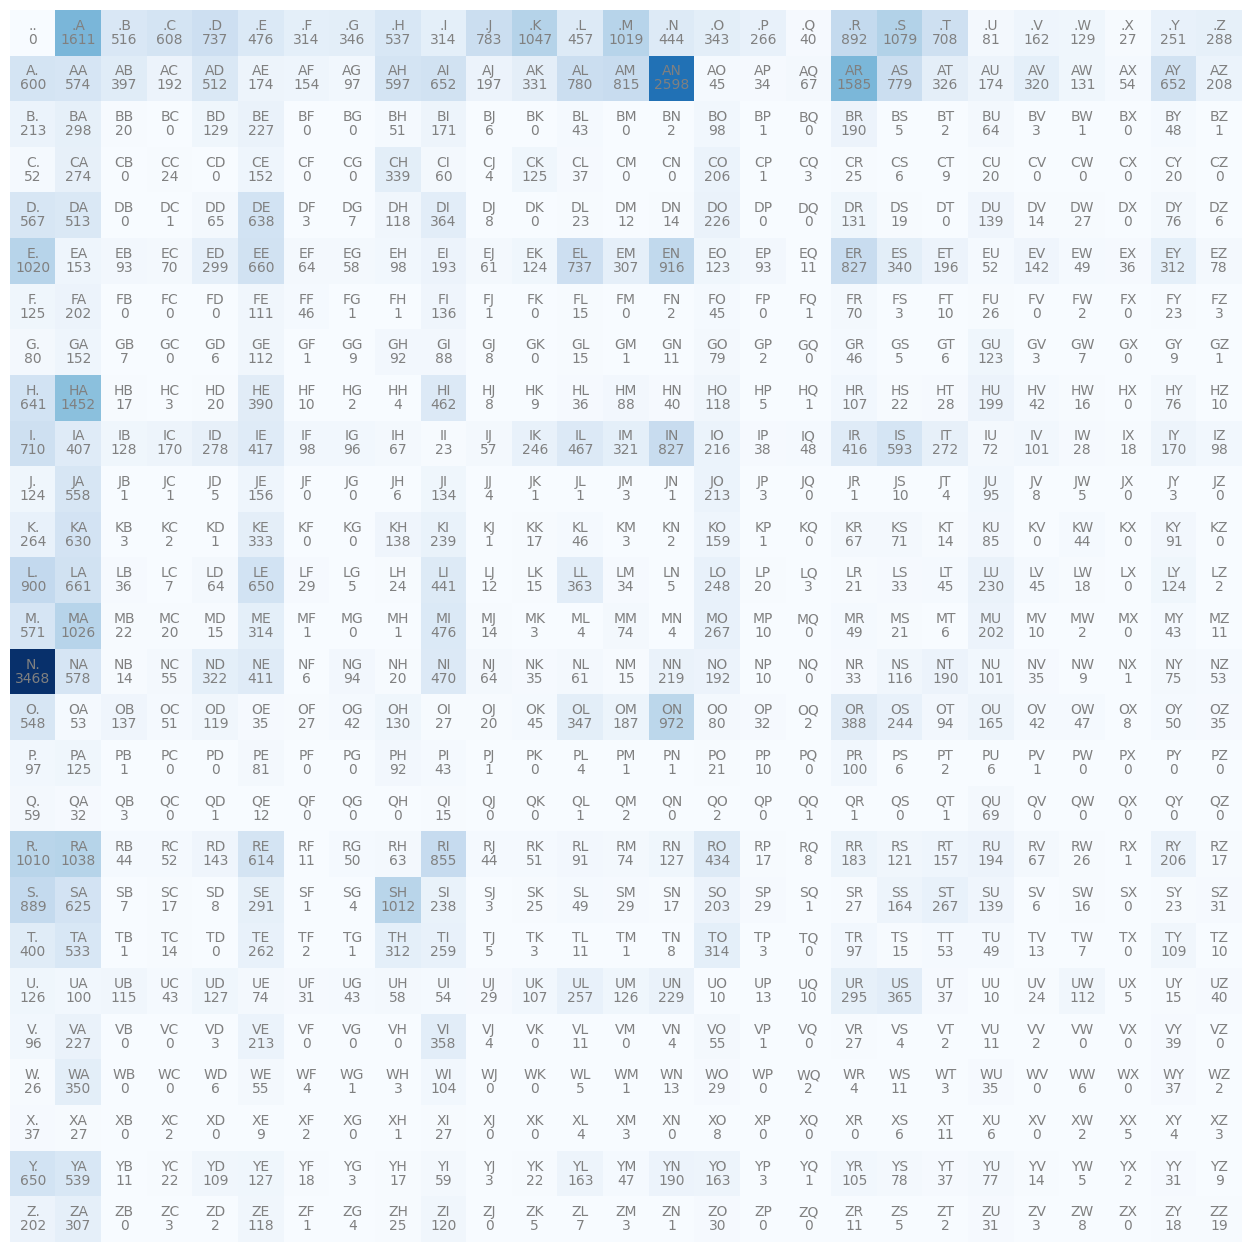

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [26]:
N[0] # first row - all starting letters 

tensor([   0, 1611,  516,  608,  737,  476,  314,  346,  537,  314,  783, 1047,
         457, 1019,  444,  343,  266,   40,  892, 1079,  708,   81,  162,  129,
          27,  251,  288], dtype=torch.int32)

In [27]:
# turns the count into probability
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1196, 0.0383, 0.0451, 0.0547, 0.0353, 0.0233, 0.0257, 0.0399,
        0.0233, 0.0581, 0.0777, 0.0339, 0.0756, 0.0329, 0.0255, 0.0197, 0.0030,
        0.0662, 0.0801, 0.0525, 0.0060, 0.0120, 0.0096, 0.0020, 0.0186, 0.0214])

In [43]:
g = torch.Generator().manual_seed(2147483647) # set the random seed 
# use torch.multinomial to sample from the probability tensor for the first letter
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() 
itos[ix]

'D'

In [44]:
# how to generate an array of random numbers between 0,1 and take them as probabilities to illustrate multinomial
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [45]:
# torch.multinomial returns teh specified number of index values sampled based on the proibabilities in the probability tensor
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [46]:
p.shape

torch.Size([3])

In [51]:
P.shape # refer to tensor broadcasting on information about operations with tensors and rules to be followed 

torch.Size([27, 27])

In [52]:
P.sum(1, keepdim=True).shape # keep dim keeps the dimensions and doesnt squash it into the lowest dimension
# the initial 1 is to signify which axis to sum on - refer to torch.sum documentation

torch.Size([27, 1])

In [24]:
# 27, 27
# 27,  1

In [53]:
P.sum(1).shape

torch.Size([27])

In [26]:
# 27, 27
#  1, 27

In [54]:
P = (N+1).float() 
# 1 is added to the count as when we are calculating the log likelihood a zero term
# will give us negative loglikehood of inf which is undesirable.
P /= P.sum(1, keepdims=True)

In [55]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

DEXZ.
KIOMASURAILAZITYHAMELLIMITTAIN.
LUSAK.
KAN.
A.


In [165]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [59]:
log_likelihood = 0.0
n = 0
# log likelihood is the log of the probability of the word occuring
# we can compute this by taking the sum of the log pf the probabilities of all bigrams
# because log(A*B*C) = log(A)+log(B)+log(C)
# to make it a minimisation problem we take the negative log_likelihood

for w in words:
# for w in ["SAMANVAY"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob 
    n += 1   # keeps count for averaging over words - averaging over words doesn't penalise long words.
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-236781.3281)
nll=tensor(236781.3281)
2.529228687286377


In [61]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[1:2]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. A
A A
A B
B A
A N
N .


In [62]:
xs

tensor([ 0,  1,  1,  2,  1, 14])

In [63]:
ys

tensor([ 1,  1,  2,  1, 14,  0])

In [64]:
# since we cannot directly pass in numerical values we use one hot encoding
# this converts each input into an array of zeroes with the position of the input having one 
# treats integers as categorical variables and creates dummy coulumns 
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() 
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [65]:
xenc.shape

torch.Size([6, 27])

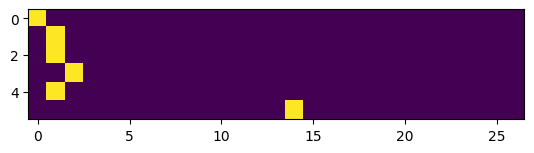

In [66]:
plt.imshow(xenc) # helps visualise the one hot encoding better

In [67]:
xenc.dtype

torch.float32

we show the equation for a neuron here which is W * X + B

In [69]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 1.1481e+00,  5.8017e-01, -4.1569e-01, -1.7366e+00,  1.0424e+00,
          4.3436e-01,  1.0177e+00,  2.5031e-01,  1.3022e+00,  1.3247e+00,
          1.1090e+00,  6.2750e-01, -1.1521e-01,  9.9273e-01,  8.5080e-01,
         -9.4216e-01,  1.5783e+00, -7.3920e-01,  1.3017e+00,  7.1199e-01,
          5.3490e-01,  7.6932e-01, -1.7280e-01,  6.6760e-01, -2.9680e-01,
         -7.8637e-03,  1.6863e-01],
        [-1.2010e-01,  1.4452e+00,  5.9738e-01, -1.0937e+00,  1.6390e+00,
         -2.1865e+00,  1.2693e+00,  3.6281e-01,  1.1106e-01, -4.0886e-01,
          1.4376e-01, -4.5648e-02, -1.7415e+00,  2.3297e-01,  8.2773e-01,
          9.9593e-03, -2.1173e+00,  6.9112e-01, -3.6930e-01,  3.8274e-02,
          1.0042e+00,  2.0336e+00,  5.5203e-01,  6.8327e-01, -1.3314e+00,
         -5.1168e-01,  1.1815e+00],
        [-1.2010e-01,  1.4452e+00,  5.9738e-01, -1.0937e+00,  1.6390e+00,
         -2.1865e+00,  1.2693e+00,  3.6281e-01,  1.1106e-01, -4.0886e-01,
          1.4376e-01, -4.5648e-02, -1.74

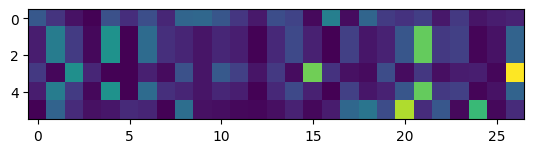

In [78]:
# The logits are assumed to be the log likelihood values
# these values are raised to the exponent then normalised to get probabilities 
logits = xenc @ W # log-counts 
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
# the last two lines are the softmax function 
plt.imshow(probs)

In [79]:
probs[0]

tensor([0.0589, 0.0334, 0.0123, 0.0033, 0.0530, 0.0289, 0.0517, 0.0240, 0.0688,
        0.0703, 0.0567, 0.0350, 0.0167, 0.0505, 0.0438, 0.0073, 0.0906, 0.0089,
        0.0687, 0.0381, 0.0319, 0.0404, 0.0157, 0.0365, 0.0139, 0.0186, 0.0221])

In [80]:
probs[0].shape

torch.Size([27])

In [81]:
probs[0].sum() # will not add upto 1 if not normalised on the right axis 

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [82]:
xs

tensor([ 0,  1,  1,  2,  1, 14])

In [83]:
ys

tensor([ 1,  1,  2,  1, 14,  0])

In [84]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [85]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [86]:
probs.shape

torch.Size([6, 27])

In [87]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .A (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.009982487186789513
log likelihood: -4.6069231033325195
negative log likelihood: 4.6069231033325195
--------
bigram example 2: AA (indexes 1,1)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0150, 0.0086, 0.0396, 0.0100, 0.0606, 0.0308, 0.1084, 0.0131, 0.0125,
        0.0048, 0.1024, 0.0086, 0.0988, 0.0112, 0.0232, 0.0207, 0.0408, 0.0078,
        0.0899, 0.0531, 0.0463, 0.0309, 0.0051, 0.0329, 0.0654, 0.0503, 0.0091])
label (actual next character): 1
probability assigned by the net to the the correct character: 0

In [88]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [89]:
xs

tensor([ 0,  1,  1,  2,  1, 14])

In [90]:
ys

tensor([ 1,  1,  2,  1, 14,  0])

In [91]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [93]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(6), ys].log().mean()

In [94]:
print(loss.item())

3.8419463634490967


In [95]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [96]:
W.data += -0.1 * W.grad

In [606]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [97]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  93618


In [98]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.739206552505493


In [99]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

TEXZMKLOGLQUSZIPCZKTXHKMPMZISTTTWIN.
LGDUKZKKTDA.
ROCXTPUCJWTSC.
GMTOKMXCZISQYTXUGKWPT.
DAJKKLUYDJMSCDGU.
